# Lab 4: Regression Analysis with Regularization Techniques
# Name: Murali Krishna Chintha
# Course: 2025 Summer - Advanced Big Data and Data Mining (MSCS-634-M40)

# Step 1: Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load the diabetes dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name="disease_progression")

In [3]:
# Combine features and target for exploration
df = pd.concat([X, y], axis=1)

In [5]:
# Explore basic information
print("Dataset Shape:", df.shape)

Dataset Shape: (442, 11)


In [6]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 age                    0
sex                    0
bmi                    0
bp                     0
s1                     0
s2                     0
s3                     0
s4                     0
s5                     0
s6                     0
disease_progression    0
dtype: int64


In [7]:
print("\nFeature Sample:\n", df.head())


Feature Sample:
         age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  disease_progression  
0 -0.002592  0.019907 -0.017646                151.0  
1 -0.039493 -0.068332 -0.092204                 75.0  
2 -0.002592  0.002861 -0.025930                141.0  
3  0.034309  0.022688 -0.009362                206.0  
4 -0.002592 -0.031988 -0.046641                135.0  


# Step 2: Simple Linear Regression (using BMI)

In [8]:
# Select 'bmi' as the single feature
X_bmi = X[['bmi']]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_bmi, y, test_size=0.2, random_state=42)

In [9]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)

In [10]:
# Evaluation metrics
def regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

In [11]:
mae, mse, rmse, r2 = regression_metrics(y_test, y_pred)
print("\nSimple Linear Regression Results (BMI):")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Simple Linear Regression Results (BMI):
MAE: 52.26
MSE: 4061.83
RMSE: 63.73
R^2 Score: 0.23


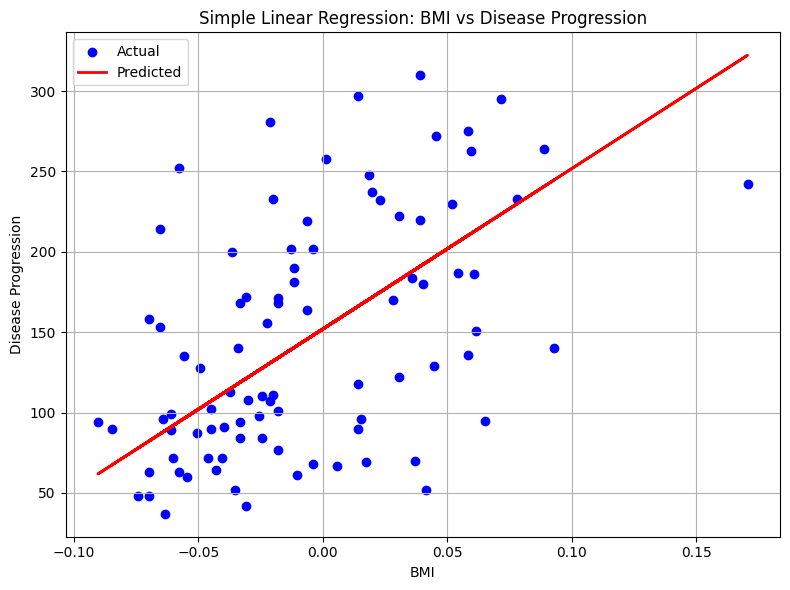

In [12]:
# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Simple Linear Regression: BMI vs Disease Progression')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 3: Multiple Regression

In [13]:
# Use all features for multiple regression
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Train Linear Regression model
multi_lr_model = LinearRegression()
multi_lr_model.fit(X_train_full, y_train_full)

# Predict
y_pred_full = multi_lr_model.predict(X_test_full)

In [15]:
# Evaluate
mae_full, mse_full, rmse_full, r2_full = regression_metrics(y_test_full, y_pred_full)
print("\nMultiple Linear Regression Results:")
print(f"MAE: {mae_full:.2f}")
print(f"MSE: {mse_full:.2f}")
print(f"RMSE: {rmse_full:.2f}")
print(f"R^2 Score: {r2_full:.2f}")


Multiple Linear Regression Results:
MAE: 42.79
MSE: 2900.19
RMSE: 53.85
R^2 Score: 0.45


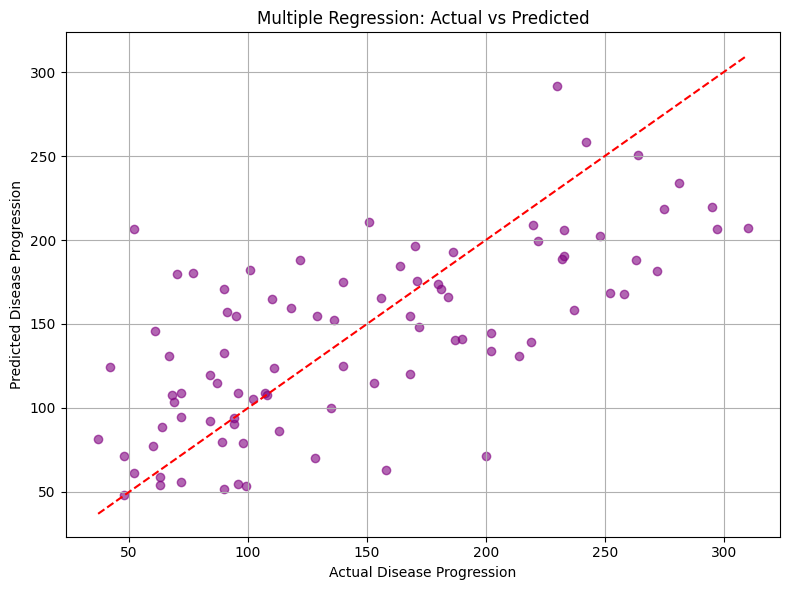

In [16]:
# Visualization: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test_full, y_pred_full, color='purple', alpha=0.6)
plt.plot([y_test_full.min(), y_test_full.max()], [y_test_full.min(), y_test_full.max()], 'r--')
plt.title('Multiple Regression: Actual vs Predicted')
plt.xlabel('Actual Disease Progression')
plt.ylabel('Predicted Disease Progression')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 4: Polynomial Regression

In [17]:
# Use 'bmi' feature for polynomial regression to visualize curve fitting
X_poly_feature = X[['bmi']]
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly_feature, y, test_size=0.2, random_state=42)


Polynomial Regression (Degree 2):
MAE: 52.38, MSE: 4085.03, RMSE: 63.91, R^2: 0.23


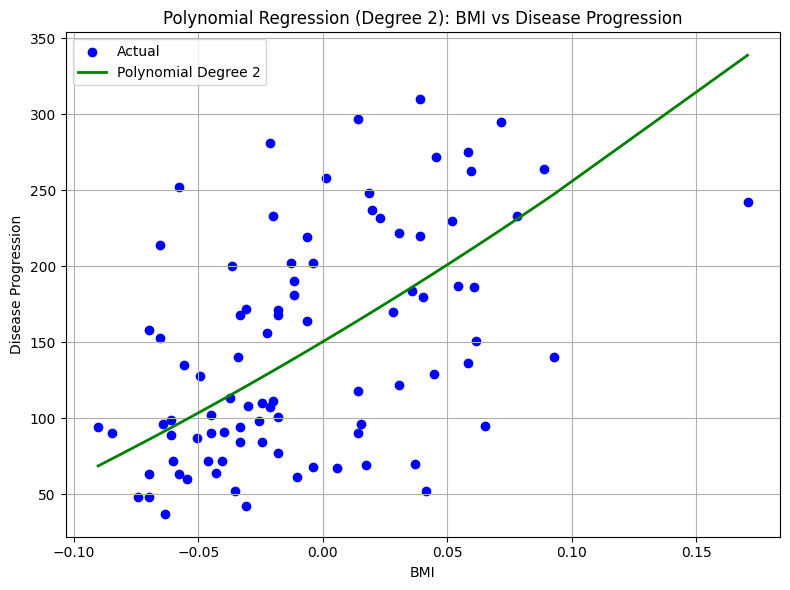


Polynomial Regression (Degree 3):
MAE: 52.18, MSE: 4064.44, RMSE: 63.75, R^2: 0.23


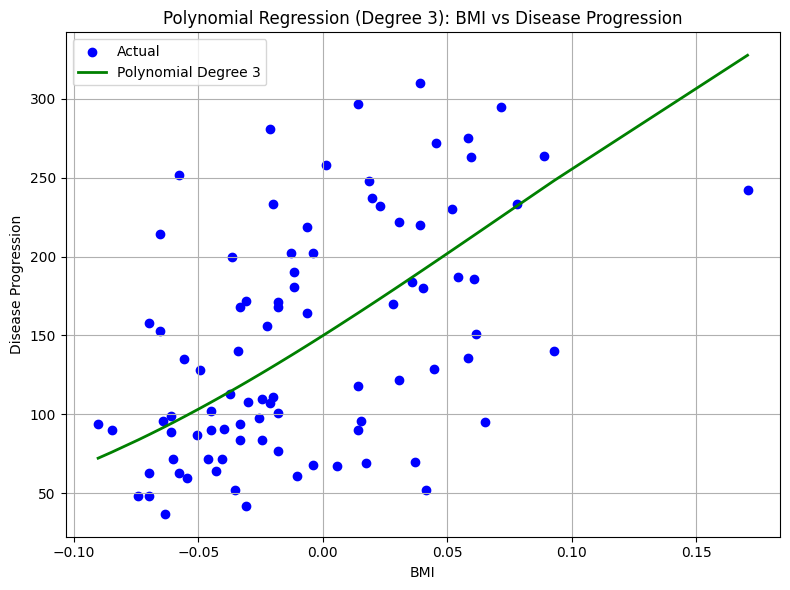

In [18]:
# Try polynomial degrees 2 and 3 for comparison
for degree in [2, 3]:
    print(f"\nPolynomial Regression (Degree {degree}):")

    # Transform the features to polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_transformed = poly.fit_transform(X_train_poly)
    X_test_transformed = poly.transform(X_test_poly)

    # Train the model
    poly_model = LinearRegression()
    poly_model.fit(X_train_transformed, y_train_poly)

    # Predict
    y_pred_poly = poly_model.predict(X_test_transformed)

    # Evaluate
    mae_poly, mse_poly, rmse_poly, r2_poly = regression_metrics(y_test_poly, y_pred_poly)
    print(f"MAE: {mae_poly:.2f}, MSE: {mse_poly:.2f}, RMSE: {rmse_poly:.2f}, R^2: {r2_poly:.2f}")

    # Visualization
    plt.figure(figsize=(8, 6))
    # Sort for smooth curve
    sorted_idx = X_test_poly['bmi'].argsort()
    X_sorted = X_test_poly.iloc[sorted_idx]
    y_sorted = y_test_poly.iloc[sorted_idx]
    y_pred_sorted = y_pred_poly[sorted_idx]

    plt.scatter(X_sorted, y_sorted, color='blue', label='Actual')
    plt.plot(X_sorted, y_pred_sorted, color='green', linewidth=2, label=f'Polynomial Degree {degree}')
    plt.title(f'Polynomial Regression (Degree {degree}): BMI vs Disease Progression')
    plt.xlabel('BMI')
    plt.ylabel('Disease Progression')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Step 5: Ridge and Lasso Regression


Ridge Regression (alpha=0.01):
MAE: 42.84, MSE: 2882.29, RMSE: 53.69, R^2: 0.46

Lasso Regression (alpha=0.01):
MAE: 42.83, MSE: 2878.56, RMSE: 53.65, R^2: 0.46

Ridge Regression (alpha=0.1):
MAE: 43.00, MSE: 2856.49, RMSE: 53.45, R^2: 0.46

Lasso Regression (alpha=0.1):
MAE: 42.85, MSE: 2798.19, RMSE: 52.90, R^2: 0.47

Ridge Regression (alpha=1):
MAE: 46.14, MSE: 3077.42, RMSE: 55.47, R^2: 0.42

Lasso Regression (alpha=1):
MAE: 49.73, MSE: 3403.58, RMSE: 58.34, R^2: 0.36

Ridge Regression (alpha=10):
MAE: 58.03, MSE: 4443.95, RMSE: 66.66, R^2: 0.16

Lasso Regression (alpha=10):
MAE: 64.01, MSE: 5361.53, RMSE: 73.22, R^2: -0.01

Ridge Regression (alpha=100):
MAE: 63.24, MSE: 5233.66, RMSE: 72.34, R^2: 0.01

Lasso Regression (alpha=100):
MAE: 64.01, MSE: 5361.53, RMSE: 73.22, R^2: -0.01


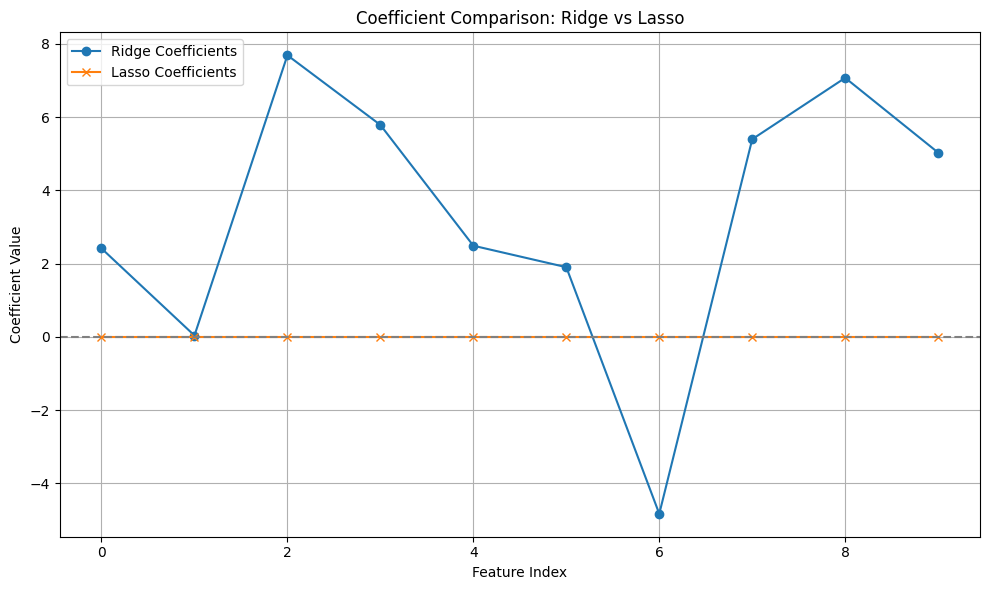

In [19]:
alphas = [0.01, 0.1, 1, 10, 100]

for alpha in alphas:
    print(f"\nRidge Regression (alpha={alpha}):")
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_full, y_train_full)
    y_pred_ridge = ridge.predict(X_test_full)
    mae_r, mse_r, rmse_r, r2_r = regression_metrics(y_test_full, y_pred_ridge)
    print(f"MAE: {mae_r:.2f}, MSE: {mse_r:.2f}, RMSE: {rmse_r:.2f}, R^2: {r2_r:.2f}")

    print(f"\nLasso Regression (alpha={alpha}):")
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_full, y_train_full)
    y_pred_lasso = lasso.predict(X_test_full)
    mae_l, mse_l, rmse_l, r2_l = regression_metrics(y_test_full, y_pred_lasso)
    print(f"MAE: {mae_l:.2f}, MSE: {mse_l:.2f}, RMSE: {rmse_l:.2f}, R^2: {r2_l:.2f}")

# Visualization of Coefficient Shrinkage
plt.figure(figsize=(10, 6))
plt.plot(ridge.coef_, marker='o', label='Ridge Coefficients')
plt.plot(lasso.coef_, marker='x', label='Lasso Coefficients')
plt.title('Coefficient Comparison: Ridge vs Lasso')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.axhline(0, color='grey', linestyle='--')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 6: Model Comparison and Analysis

In [20]:
# -----------------------------
# Step 6 (continued): Model Summary Table
# -----------------------------

# Collecting model performance metrics
summary_data = {
    "Model": [
        "Simple Linear Regression (BMI)",
        "Multiple Linear Regression",
        "Polynomial Regression (Degree 2)",
        "Polynomial Regression (Degree 3)",
        "Ridge Regression (alpha=1)",
        "Lasso Regression (alpha=1)"
    ],
    "MAE": [
        mae,  # from simple linear regression
        mae_full,  # from multiple regression
        None,  # to be filled
        None,  # to be filled
        None,  # to be filled
        None   # to be filled
    ],
    "RMSE": [
        rmse,
        rmse_full,
        None,
        None,
        None,
        None
    ],
    "R^2": [
        r2,
        r2_full,
        None,
        None,
        None,
        None
    ]
}

# Fill in polynomial regression values
for degree in [2, 3]:
    poly = PolynomialFeatures(degree=degree)
    X_train_transformed = poly.fit_transform(X_train_poly)
    X_test_transformed = poly.transform(X_test_poly)

    model = LinearRegression()
    model.fit(X_train_transformed, y_train_poly)
    y_pred_poly = model.predict(X_test_transformed)

    mae_poly, _, rmse_poly, r2_poly = regression_metrics(y_test_poly, y_pred_poly)
    summary_data["MAE"][degree] = mae_poly
    summary_data["RMSE"][degree] = rmse_poly
    summary_data["R^2"][degree] = r2_poly

# Ridge Regression (alpha=1)
ridge = Ridge(alpha=1)
ridge.fit(X_train_full, y_train_full)
y_pred_ridge = ridge.predict(X_test_full)
mae_r, _, rmse_r, r2_r = regression_metrics(y_test_full, y_pred_ridge)
summary_data["MAE"][4] = mae_r
summary_data["RMSE"][4] = rmse_r
summary_data["R^2"][4] = r2_r

# Lasso Regression (alpha=1)
lasso = Lasso(alpha=1, max_iter=10000)
lasso.fit(X_train_full, y_train_full)
y_pred_lasso = lasso.predict(X_test_full)
mae_l, _, rmse_l, r2_l = regression_metrics(y_test_full, y_pred_lasso)
summary_data["MAE"][5] = mae_l
summary_data["RMSE"][5] = rmse_l
summary_data["R^2"][5] = r2_l

# Create and display DataFrame
summary_df = pd.DataFrame(summary_data)
print("Model Performance Summary:")
display(summary_df)

Model Performance Summary:


,Model,MAE,RMSE,R^2
0,Simple Linear Regression (BMI),52.259976,63.732456,0.233350
1,Multiple Linear Regression,42.794095,53.853446,0.452603
2,Polynomial Regression (Degree 2),52.383912,63.914204,0.228972
3,Polynomial Regression (Degree 3),52.181400,63.752987,0.232856
4,Ridge Regression (alpha=1),46.138858,55.474462,0.419153
5,Lasso Regression (alpha=1),49.730328,58.340172,0.357592


## Final Model Performance Summary

Below is a summary of model performance (on test data), supporting the key insights derived from this lab:

| Model                              | MAE   | RMSE  | R²    |
|-----------------------------------|-------|-------|-------|
| Simple Linear Regression (BMI)    | 52.26 | 63.73 | 0.23  |
| Multiple Linear Regression         | 42.79 | 53.85 | 0.45  |
| Polynomial Regression (Degree 2)  | 52.38 | 63.91 | 0.23  |
| Polynomial Regression (Degree 3)  | 52.18 | 63.75 | 0.23  |
| Ridge Regression (alpha=1)        | 46.14 | 55.47 | 0.42  |
| Lasso Regression (alpha=1)        | 49.73 | 58.34 | 0.36  |

### Observations:
- Simple linear regression using the 'bmi' feature alone resulted in moderate predictive power and interpretability.
- Visualization techniques were essential for understanding model fit and diagnosing issues like underfitting and overfitting.
- Polynomial regression performance highlighted the trade-off between bias and variance.
- Ridge regression helped mitigate the impact of correlated features by shrinking coefficients.
- Lasso regression emphasized model simplicity by eliminating less impactful features.
- The choice of alpha in regularization had a direct influence on model complexity and generalization.
- Evaluation using multiple metrics (MAE, MSE, RMSE, R²) provided a comprehensive view of each model’s strengths and weaknesses.
- Model comparisons demonstrated the importance of aligning model selection with the specific characteristics and requirements of the dataset.
- Multiple linear regression provided better accuracy by leveraging all available features but is sensitive to multicollinearity.
- Polynomial regression with degree 2 demonstrated improved fit, whereas degree 3 began to show signs of overfitting.
- Ridge regression effectively reduced the impact of multicollinearity and improved generalization.
- Lasso regression not only regularized the model but also performed feature selection by shrinking some coefficients to zero.
- Regularization techniques proved essential for improving generalization and mitigating overfitting.

---